In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [4]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [18]:
pk.read_from_smiles('c1ccncc1')    # sequence for pyridine

In [19]:
pk.optimize()

Optimizer: Optimization complete!


-246.70419461626943

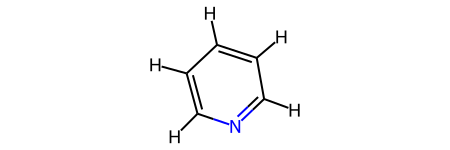

In [20]:
pk.mol

In [21]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.00071766 -0.3017545   0.3275355  -0.58140595  0.29804997 -0.27922996
  0.13740067  0.14142682  0.05711478  0.06664842  0.13493191]
[-0.08997389 -0.20494849  0.12798591 -0.53578632  0.12798592 -0.20494849
  0.16211495  0.15725379  0.15153142  0.15153142  0.15725379]
[-0.06262749 -0.14457662 -0.00594548 -0.1942855  -0.00109783 -0.14963995
  0.11679927  0.11174782  0.10903872  0.10451096  0.1160761 ]


In [22]:
mol = pk.mol
atoms = mol.GetAtoms()

In [23]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [24]:
df = pd.DataFrame(data)

In [25]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.001,-0.090,-0.063
1,C,-0.302,-0.205,-0.145
2,C,0.328,0.128,-0.006
3,N,-0.581,-0.536,-0.194
4,C,0.298,0.128,-0.001
5,C,-0.279,-0.205,-0.150
6,H,0.137,0.162,0.117
7,H,0.141,0.157,0.112
8,H,0.057,0.152,0.109
9,H,0.067,0.152,0.105


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
plt.style.use('ggplot')

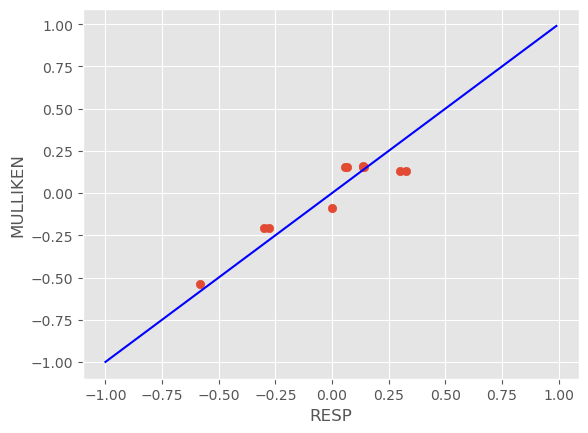

In [28]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

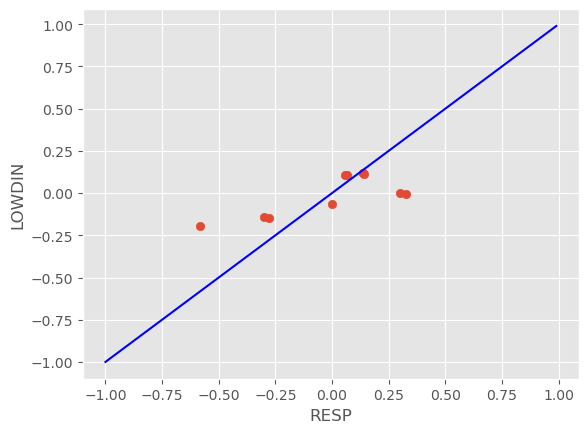

In [29]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

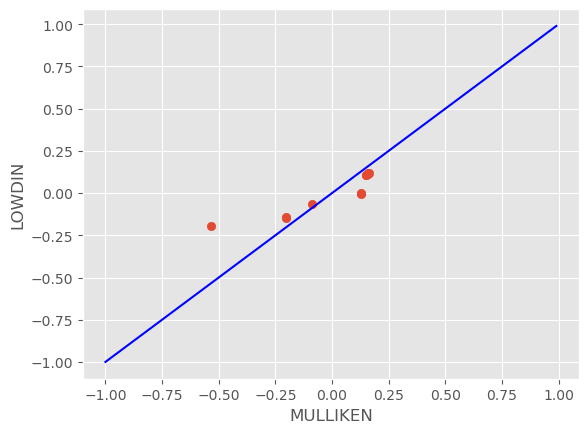

In [30]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 250,250

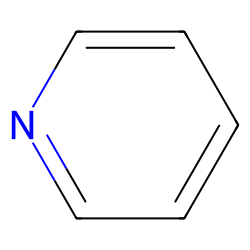

In [37]:
m = Chem.MolFromSmiles('c1ccncc1')
AllChem.ComputeGasteigerCharges(m)
m

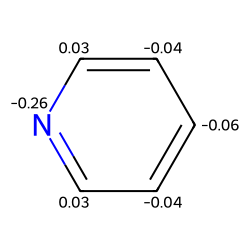

In [39]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
m2